# Статистика, DS-поток
## Задание SP.2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Баллы за задание:**

* Задача 1 &mdash;  20 баллов
* Задача 2 &mdash;  20 баллов
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  50 баллов
* Задача 5 &mdash;  50 баллов

**Важность задач:**

* *высокая:* задачи 2, 3, 5;
* *средне-высокая:* задача 4;
* *обычная* задача 1.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

In [ ]:
# Bot check

# HW_ID: ds_sp2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

*Замечания.*
1. Вы должны помнить о разнице между оценкой / доверительным интервалом и *реализацией* оценки / доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если оценка/интервал получен на лекции/семинаре, то нужно просто выписать формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

---

## Задача 1. 


**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** $\frac{n+1}{n}X_{(n)}$, $2\overline{X}$

Проведите практическое исследование несмещенности перечисленных оценок аналогично ислледованию несмещенности выборочной дисперсии в предыдущих заданиях. Разбор этой задачи для выборочной дисперсии был на занятии.

**Решение:**

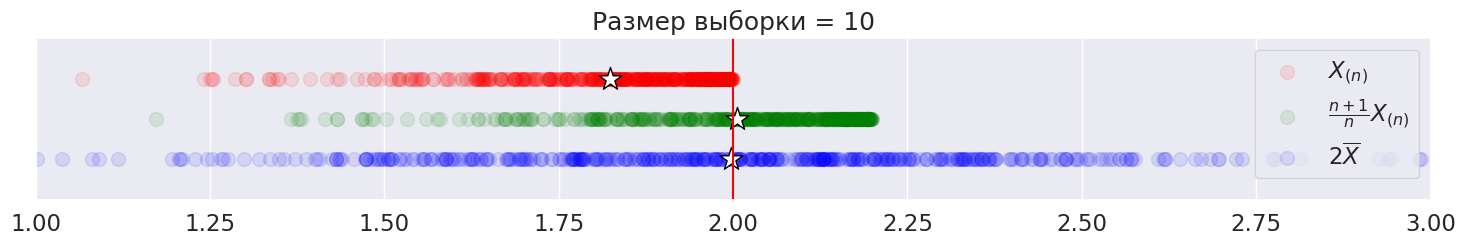

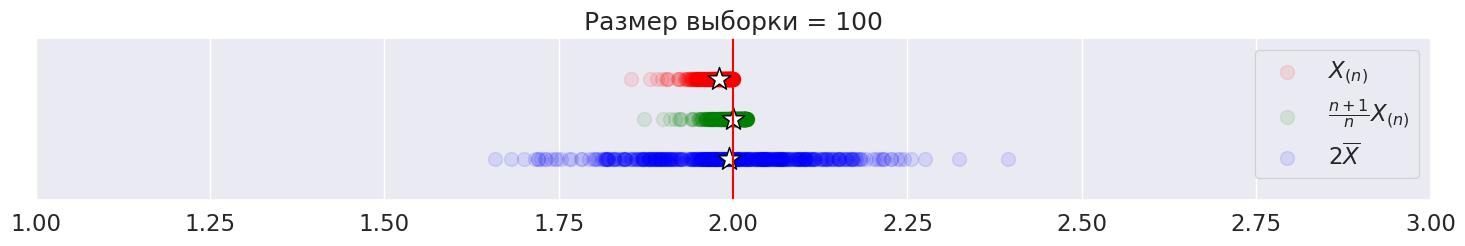

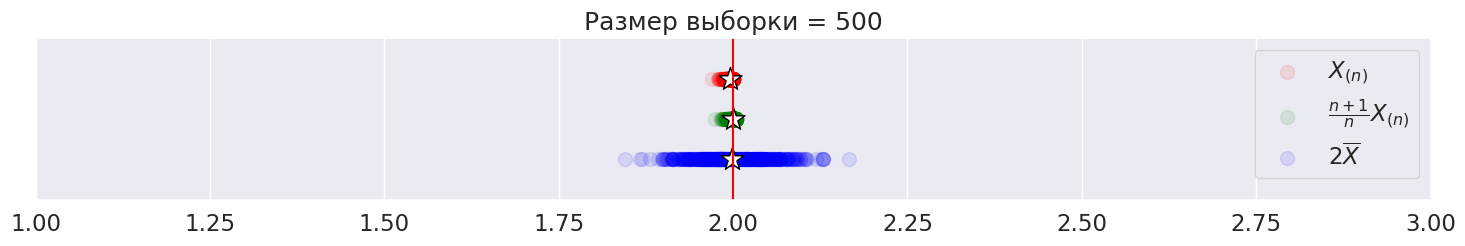

In [14]:
def estimate_xn(X):
    return np.amax(X, axis=-1)


def estimate_xn_corr(X):
    n = X.shape[-1]
    return (n + 1) / n * np.amax(X, axis=-1)


def estimate_2mean(X):
    return 2.0 * np.average(X, axis=-1)


estimators = [
    (estimate_xn, "$X_{(n)}$", "red", 0.2),
    (estimate_xn_corr, "$\\frac{n+1}{n}X_{(n)}$", "green", 0.1),
    (estimate_2mean, "$2\\overline{X}$", "blue", 0.0)
]

def est_plot(distribution, estimators, sample_size, sample_count):  
    '''
    Построение графика разброса реализаций оценок и их средних значений.
    
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''    

    X = distribution.rvs(size=(sample_count, sample_size))
    
    plt.figure(figsize=(18, 0.7 * len(estimators)))
    for estimator, name, color, y in estimators:
        E = estimator(X)

        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(2, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend()
    plt.xlim((1.0, 3.0))
    plt.ylim((-0.1, 0.1 * len(estimators)))

sample_size_list = (10, 100, 500)  # размеры выборок
sample_count = 500  # количество экспериментов

for sample_size in sample_size_list:
    est_plot(sps.uniform(loc=0.0, scale=2.0), estimators, sample_size, sample_count)

**Вывод:** Результаты эксперимента показывают, что мы правильно разделили оценки на смещённые и несмещённые. При этом можно отметить, что $X_{(n)}$ стремится к $\theta$ несмотря на то, что является смещённой оценкой.

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, причем $a$ не известно. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2 = \overline{X^2} - \overline{X}^2$ дисперсии $\sigma^2$. 

Примеры кода можно посмотреть в материалах лекций. Обязательно на графике оценок визуализируйте границы, которые задает свойство асимптотической нормальности.

**Решение:**

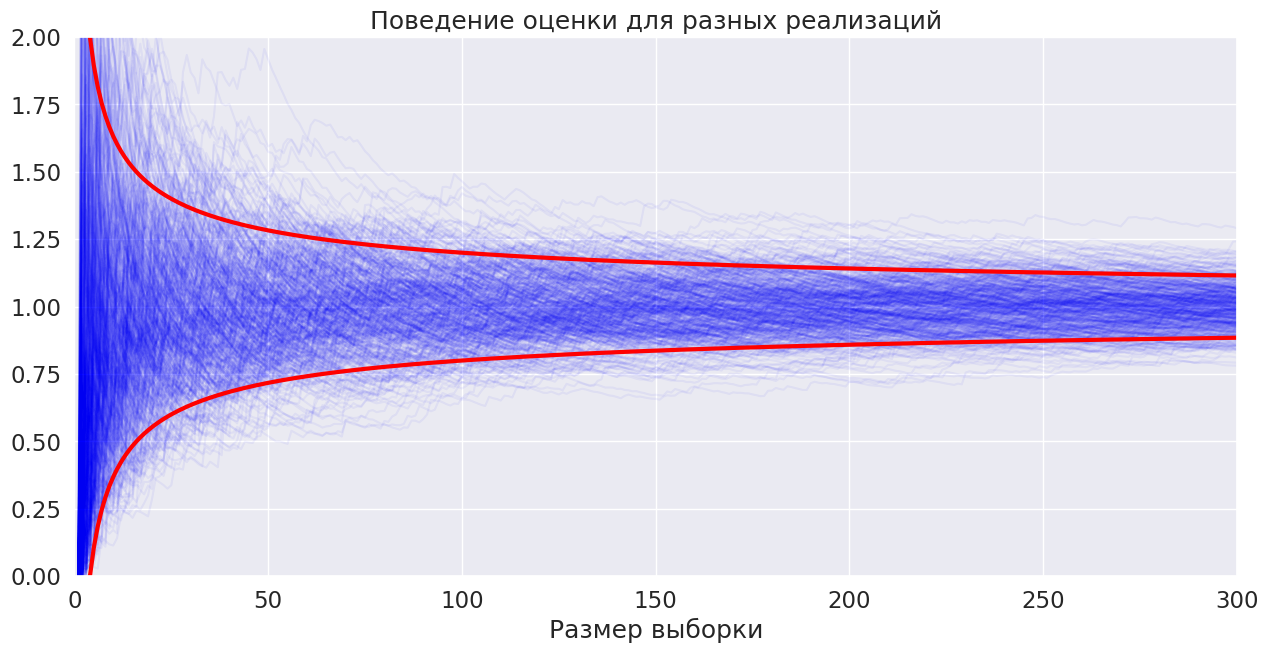

In [7]:
size = 300  # размер выборок
samples_count = 500  # количество выборок
n_range = (np.arange(size) + 1)  # размеры подвыборок
s = 1.0

# генерируем множество выборок, 
# параметр theta является обратным к параметру масштаба
samples = sps.norm.rvs(size=(samples_count, size))
# вычисляем оценки в зависимости от размера выборки, 
# усредняем по последней оси
estimation = np.cumsum(samples ** 2, axis=1) / n_range - (np.cumsum(samples, axis=1) / n_range) ** 2

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, estimation[i], color='blue', alpha=0.05)
plt.plot(n_range, s ** 2 + 2*s ** 2/np.sqrt(n_range), color='red', lw=3)
plt.plot(n_range, s ** 2 - 2*s ** 2/np.sqrt(n_range), color='red', lw=3)
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 2))
plt.xlim((0, size));

Для оценки асимпотической нормальности вычислим дисперсию оценки дисперсии, зная, что оценка распределена как $\chi_{n-1}^2$.

$$
\mathsf{D}\overline{(X-\overline{X})^2}=2\sigma^4\frac{n-1}{n}
$$

/tmp/ipykernel_48824/35829546.py:2: RuntimeWarning: divide by zero encountered in divide
  Zn = (estimation - s ** 2) * np.sqrt(n_range) / (np.sqrt(2 * s ** 4 * (n_range - 1) / n_range))


(0.0, 300.0)

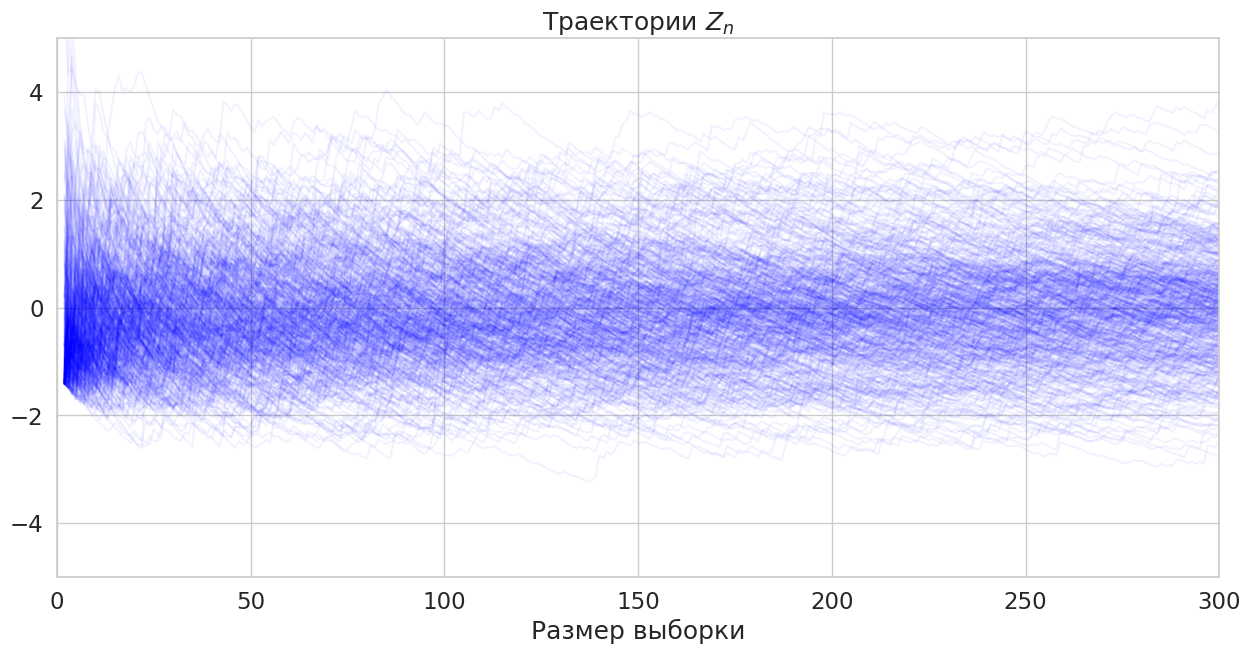

In [113]:
m4 = np.cumsum(samples ** 4, axis=1) / n_range
Zn = (estimation - s ** 2) * np.sqrt(n_range) / (np.sqrt(2 * s ** 4 * (n_range - 1) / n_range))

plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, Zn[i], color='blue', alpha=0.05)
plt.title('Траектории $Z_n$')
plt.xlabel('Размер выборки')
plt.ylim((-5, 5))
plt.xlim((0, size))

Text(0.5, 1.0, 'Аппроксимация')

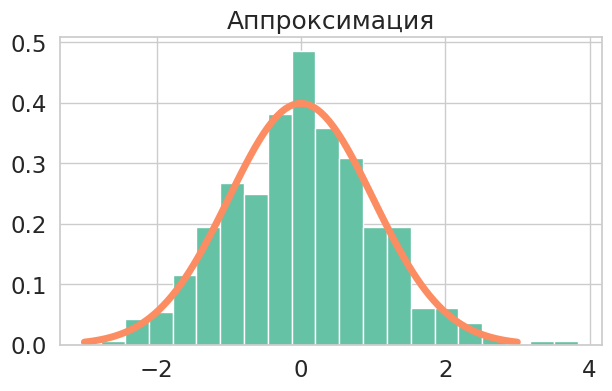

In [114]:
sns.set_style('whitegrid')
grid = np.linspace(-3, 3, 100)

plt.figure(figsize=(7, 4))
plt.hist(Zn[:, -1], bins=20, density=True)
plt.plot(grid, sps.norm.pdf(grid), lw=5)
plt.title('Аппроксимация')

**Вывод:** Мы убедились в том, что избранная нами оценка дисперсии является состоятельной и асимптотически нормальной, получили дисперсию оценки, что позволит в дальнейшем оценить доверительный интервал.

---
## Задача 3.

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$, причем $a$ не известно. Визуализируйте асимптотический доверительный интервал Вальда для параметра дисперсии при росте размера выборки. 

Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $\alpha=0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную выше функцию. На график также нужно нанести точки выборки.

Чтобы не плодить код, напишите следующую функцию (см. ниже). При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

**Решение:**

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Точки выборки не подписаны на легенде.

In [10]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка', label_sample='Выборка', label_interval='Дов. интервал'
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    '''
    
    n_range = np.arange(1, estimation.shape[0] + 1)
    plt.fill_between(x=n_range, y1=left, y2=right, color=color_interval, alpha=0.5, label=label_interval)
    if sample is not None:
        plt.hlines(sample, n_range[0], n_range[-1], color=color_sample, alpha=0.3, label=label_sample)
    plt.ylim(ylim)
    plt.plot(n_range, estimation, color=color_estimation, label=label_estimation)

<b><font color="#00b565" size="3">Замечание:</font></b> Нет никаких формул для интервалов. Комм. Не выписаны явно формулы для интервалов, они есть только в коде. См. замечание в начале условия задания

Доверительный интервал Вальда:

$$
\sigma^2\in\left(\overline{X^2}-\overline{X}^2\pm z_\frac{1+\alpha}{2}\frac{\sqrt{2S^4(n-1)}}{n}\right)
$$

<b><font color="#00b565" size="3">Замечание:</font></b> Неудобный масштаб графика. Комм. Стоило построить либо в plotly, либо установить удобный ylim. Инд. комм. График маленький, точек много

<b><font color="#00b565" size="3">Замечание:</font></b> Нет названия у графика. Комм. Стоило как-то назвать графики, графики потеряли немного в наглядности и информативности.

<b><font color="#00b565" size="3">Замечание:</font></b> Нет истинного значения на графике. Комм. в выводе, конечно, написано про 1/n и про 1/sqrt(n), но нет самих распределений.

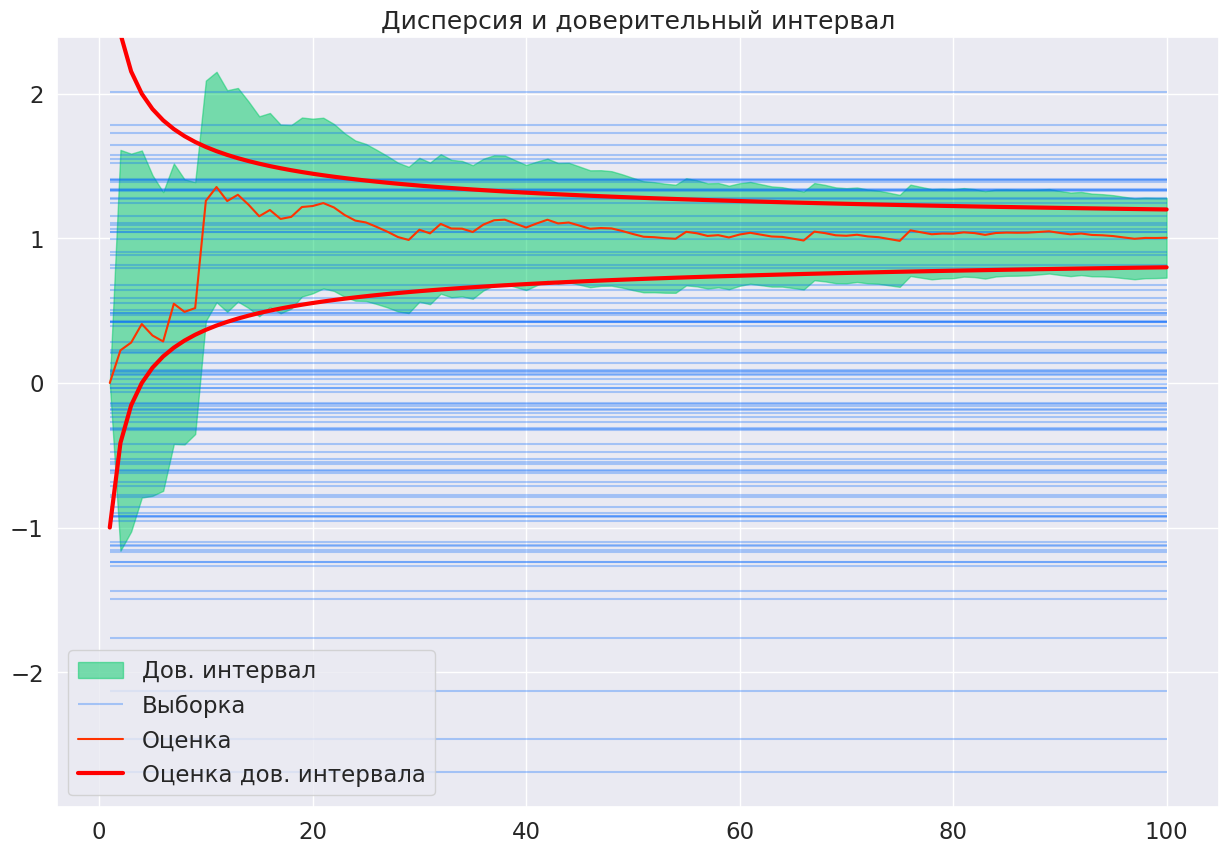

In [15]:
sample = sps.norm.rvs(size=(100, ))
n_range = np.arange(1, 101)
est = np.cumsum(sample ** 2, axis=-1) / n_range - (np.cumsum(sample, axis=-1) / n_range) ** 2
z = sps.norm.ppf((1 + 0.95) / 2)
left = est - z * np.sqrt(2 * s ** 4 * (n_range - 1) / n_range) / np.sqrt(n_range)
right = est + z * np.sqrt(2 * s ** 4 * (n_range - 1) / n_range) / np.sqrt(n_range)
plt.figure(figsize=(15,10))
draw_confidence_interval(left, right, est, sample)
plt.plot(n_range, s ** 2 + 2*s ** 2/np.sqrt(n_range), color='red', lw=3, label='Оценка дов. интервала')
plt.plot(n_range, s ** 2 - 2*s ** 2/np.sqrt(n_range), color='red', lw=3)
plt.title('Дисперсия и доверительный интервал')
plt.legend()
plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

**Вывод:** Мы получили оценку дисперсии, близкую к истинной и с достаточно узким доверительным интервалом (не более $\pm 20\%$ от значения).

_________________
## Задача 4.
Аналогично задаче 3 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Нет легенды/ названия графика / истинного значения параметра.

<b><font color="#00b565" size="3">Замечание:</font></b> Первый доверительный интервал посчитан неверно.

<b><font color="#00b565" size="3">Замечание:</font></b> Второй доверительный интервал посчитан неверно.

/tmp/ipykernel_14025/2218803128.py:19: RuntimeWarning: divide by zero encountered in divide
  est = mean / var
/tmp/ipykernel_14025/2218803128.py:22: RuntimeWarning: divide by zero encountered in divide
  est - factor * mean \
/tmp/ipykernel_14025/2218803128.py:22: RuntimeWarning: invalid value encountered in subtract
  est - factor * mean \
/tmp/ipykernel_14025/2218803128.py:28: RuntimeWarning: divide by zero encountered in divide
  est + factor * mean \


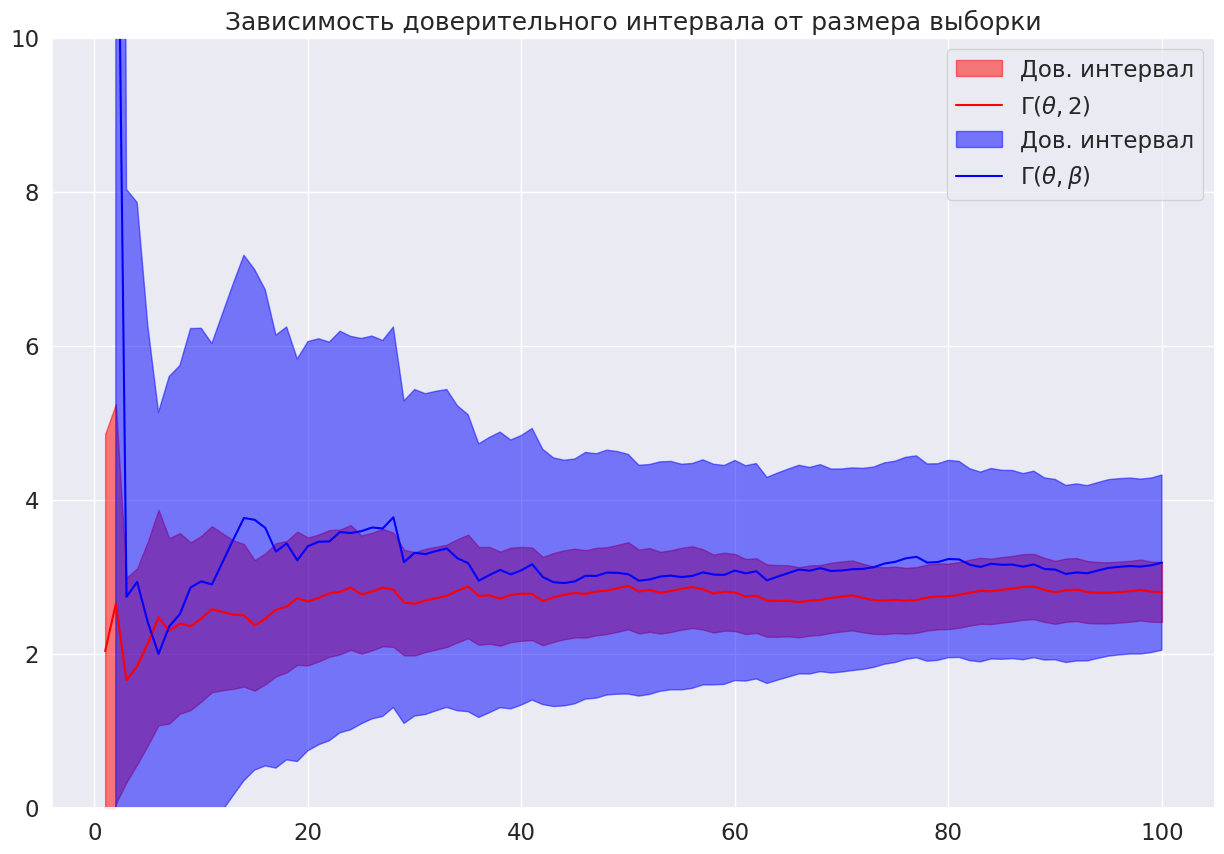

In [25]:
plt.figure(figsize=(15,10))

X = sps.gamma(a=2, scale=1/3).rvs(size=(100, ))
beta = 2.0
alpha = 0.95
mean = np.cumsum(X) / n_range
var = np.cumsum(X**2) / n_range - mean**2
est = beta / mean
left = (
    est - np.sqrt(beta) * sps.norm.ppf(1/2 + alpha/2)
    / (np.sqrt(n_range) * mean)
)
right = (
    est + np.sqrt(beta) * sps.norm.ppf(1/2 + alpha/2)
    / (np.sqrt(n_range) * mean)
)
draw_confidence_interval(left, right, est, color_interval="red", color_estimation="red", label_estimation='$\Gamma(\\theta,2)$')

est = mean / var
factor = np.sqrt(2 + 3 * var / (mean ** 2))
left = (
    est - factor * mean \
    * sps.norm.ppf(1/2 + alpha/2) \
    / (np.sqrt(n_range) * var)
)

right = (
    est + factor * mean \
    * sps.norm.ppf(1/2 + alpha/2) \
    / (np.sqrt(n_range) * var)
)
draw_confidence_interval(left, right, est, ylim=(0,10), color_interval="blue", color_estimation="blue", label_estimation='$\Gamma(\\theta,\\beta)$')

plt.legend()
plt.title('Зависимость доверительного интервала от размера выборки')
plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

Сравните полученные интервалы и поясните наблюдаемый эффект.

**Вывод:** Первая оценка сходится к истинному значению $\theta$, однако имеем широкий доверительный интервал. Вторая оценка сходится к $\theta$ существенно медленнее, но с более узким доверительным интервалом. По всей видимости это связано с тем, что во втором случае мы оцениваем также и $\beta$, и на каком-то этапе мы можем посчитать более оптимальным вариант, где и $\beta$ отличается от истинного.

___
## Задача 5.

Пусть случайная величина $X$ имеет нормальное распределение с параметрами $(a, \sigma^2)$, то есть:
$$
X \sim \mathcal{N}(a, \sigma^2)
$$
Рассмотрим следующую задачу оптимизации:
$$
f(X) = (\mathsf{E}X-1)^2 + (\mathsf{D}X - 1)^2 \longrightarrow \min_{a, \sigma^2}
$$
В данном случае правильный ответ мы можем легко найти непосредственно, однако в реальности возникают гораздо более сложные функции, и решить задачу напрямую руками не представляется возможным. Для решения таких задач применяются различные градиентные методы, такие как, например, стохастический градиентный спуск. Оказывается, что в нём критически важно использовать несмещенные оценки градиента.

*Замечание.* Если смещение заключается только в том, что математическое ожидание оценки отличается от вектора градиента домножением каждой компоненты на одну и ту же константу, то проблем нет &mdash; все равно мы используем шаг градиента.

В данной задаче вам предлагается на примере простой функции убедиться, насколько важным оказывается использовать несмещенные оценки в итерационных процедурах.

**Решение:**

Запишите оптимальные значения параметров $a$ и $\sigma^2$, а также шаг простого градиентного спуска для минимизаци определенной выше функции $f(X)$:

$$
a = 1, \qquad \sigma^2=1
$$

$$
\frac{\partial f}{\partial a}=2(a-1)\qquad \frac{\partial f}{\partial \sigma^2}=2(\sigma^2-1)
$$

$$
\theta_{k+1}=(1-2\eta)\theta_k+2\eta
$$

Реализуйте метод простого градиентного спуска для выше описанной задачи оптимизации. Для каждой итерации сохраните текущие значения среднего и дисперсии, постройте график зависимости значений $a$ и $\sigma^2$ от шага процедуры. Наблюдается ли сходимость к оптимальным параметрам?

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Плохой график. Комм. Информативная часть графика слишком маленькая. Инд. комм. EX и DX сливаются, можно было бы разделить на 2 графика

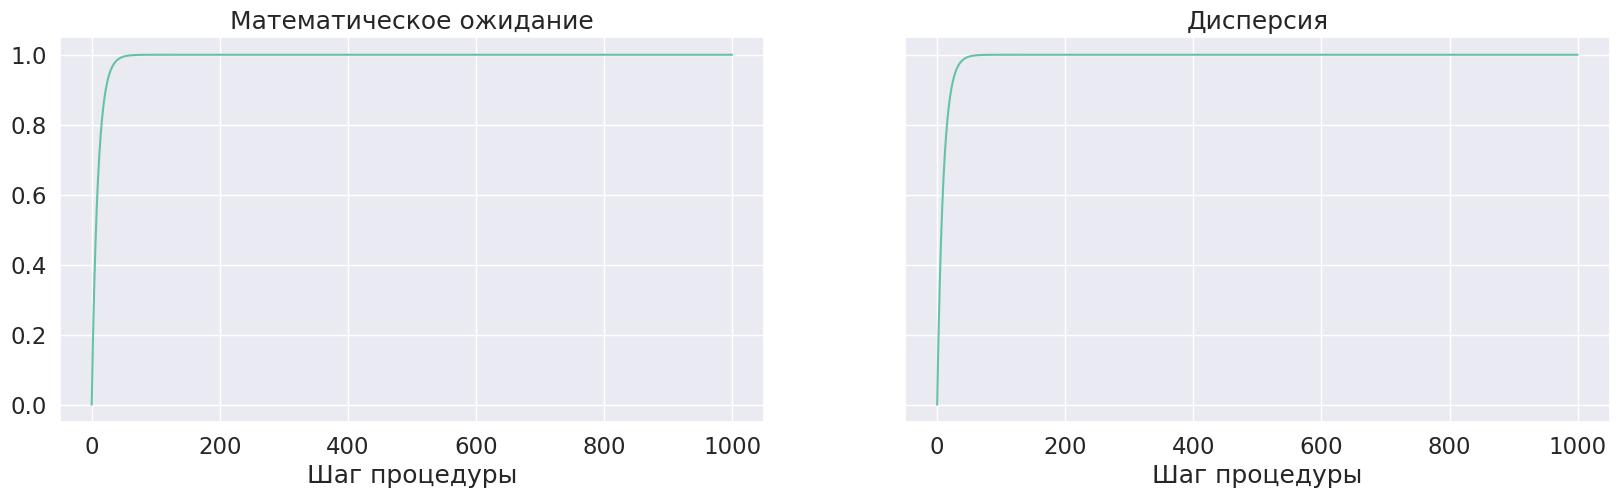

In [34]:
mean = [0.0]
disp = [0.0]
theta = np.array([0.0, 0.0])
lr = 0.05
for i in range(1000):
    theta -= 2 * lr * theta - 2 * lr
    mean.append(theta[0])
    disp.append(theta[1])

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(20, 5))

ax[0].plot(np.arange(1001), mean)
ax[0].set_title('Математическое ожидание')
ax[0].set_xlabel('Шаг процедуры')

ax[1].plot(np.arange(1001), disp)
ax[1].set_title('Дисперсия')
ax[1].set_xlabel('Шаг процедуры')

plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

Теперь предположим, что мы хотим оценить градиент стохастически. Например, давайте текущие значения среднего и дисперсии оценивать изученным ранее методом Монте-Карло. А именно, каждый раз мы будем генерировать выборку размера 5 из нормального распределения с текущими значениями параметров и далее по ней оценивать градиент.
Для оценки математического ожидания ипользуйте несмещенную оценку, а для дисперсии &mdash; смещенную. 

Реализуйте описанный выше подход. Как и прежде, изобразите текущие значения параметров в зависимости от итерации. Сошлась ли такая процедура к оптимальным значениям?

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> Не указано теор. значение смещенной оценки. Комм. При использовании смещенной оценки стоило изобразить к какому теоретическому значению сходится оценка (5/4).

<b><font color="#00b565" size="3">Замечание:</font></b> Нет названия графика.

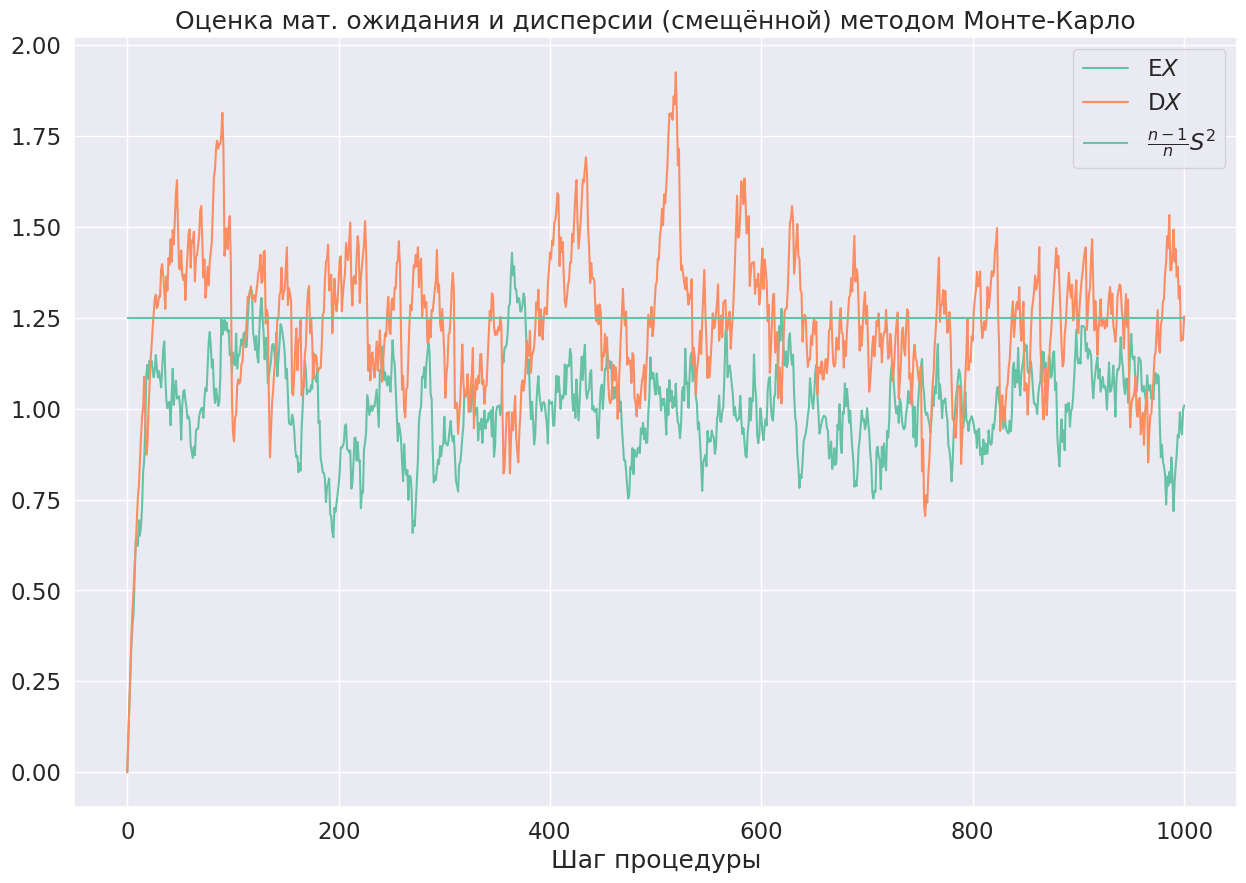

In [45]:
mean = [0.0]
disp = [0.0]
disp_true = [0.0]
theta = np.array([0.0, 0.0])
lr = 0.05
for i in range(1000):
    X = sps.norm(loc=mean[-1], scale=np.sqrt(disp[-1])).rvs(size=(5,))
    est = np.array([np.mean(X), np.var(X)])
    theta -= 2 * lr * est - 2 * lr
    mean.append(theta[0])
    disp.append(theta[1])
    disp_true.append((i + 2) / (i + 1))

plt.figure(figsize=(15, 10))
plt.plot(np.arange(1001), mean, disp)
plt.hlines(5 / 4, 0, 1000)
plt.legend(['$\mathsf{E}X$', '$\mathsf{D}X$', '$\\frac{n-1}{n}S^2$'])
plt.xlabel('Шаг процедуры')
plt.title('Оценка мат. ожидания и дисперсии (смещённой) методом Монте-Карло')
plt.show()

Теперь изменим нашу процедуру, взяв несмещенную оценку для дисперсии. Обратите внимание на параметр `ddof` в функции `np.var`. Поменялся ли результат?

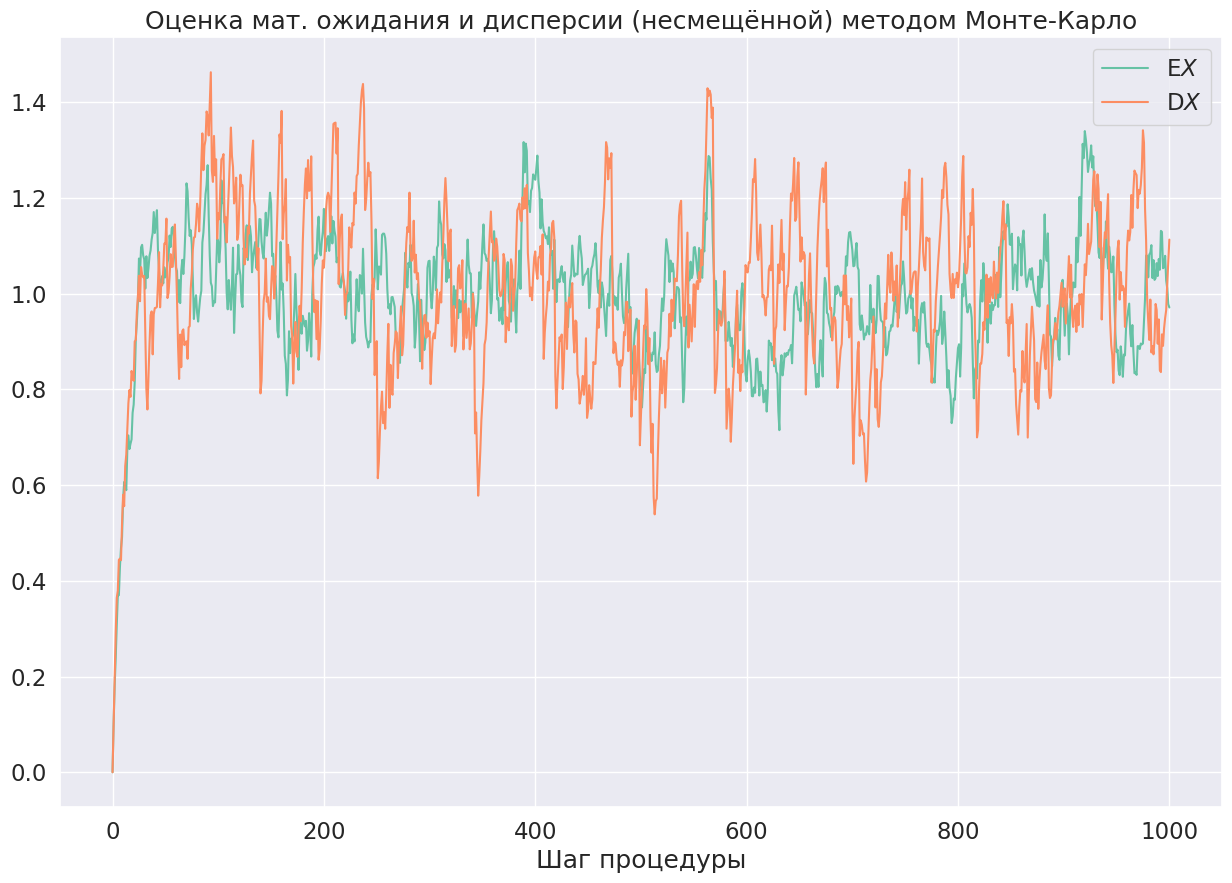

In [46]:
mean = [0.0]
disp = [0.0]
theta = np.array([0.0, 0.0])
lr = 0.05
for i in range(1000):
    X = sps.norm(loc=mean[-1], scale=np.sqrt(disp[-1])).rvs(size=(5,))
    est = np.array([np.mean(X), np.var(X, ddof=1)])
    theta -= 2 * lr * est - 2 * lr
    mean.append(theta[0])
    disp.append(theta[1])

plt.figure(figsize=(15, 10))
plt.plot(np.arange(1001), mean, disp)
plt.legend(['$\mathsf{E}X$', '$\mathsf{D}X$'])
plt.xlabel('Шаг процедуры')
plt.title('Оценка мат. ожидания и дисперсии (несмещённой) методом Монте-Карло')
plt.show()

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

**Вывод:** смещённая оценка дисперсии приводит к тому, что процедура сходится к значениям, не являющимся оптимальными. Несмещённая оценка позволяет этого избежать. Тем не менее, простой градиентный спуск сходится <<стабильнее>>, что, вероятно, связано с малыми размерами выборки в методе Монте-Карло и малым числом итераций.